In [1]:
import tensorflow as tf

### tensorflow validation 

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


## small linear regression to test tensorflow 

In [3]:
import numpy as np 

In [4]:
xdata = np.random.rand(100).astype(np.float32)

In [6]:
ydata = xdata*0.1+0.3

### 1. create structure 

In [7]:
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))

In [9]:
biases = tf.Variable(tf.zeros([1]))

In [13]:
y = Weights*xdata+biases
loss = tf.reduce_mean(tf.square(y-ydata))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [15]:
init = tf.global_variables_initializer()

### 2.activate the structure  

In [16]:
sess = tf.Session()

In [17]:
sess.run(init)

In [18]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [ 0.54133815] [ 0.0833817]
20 [ 0.20826662] [ 0.24247989]
40 [ 0.12701219] [ 0.28564891]
60 [ 0.10673946] [ 0.29641947]
80 [ 0.10168148] [ 0.29910669]
100 [ 0.10041951] [ 0.29977712]
120 [ 0.10010467] [ 0.2999444]
140 [ 0.10002612] [ 0.29998612]
160 [ 0.10000651] [ 0.29999655]
180 [ 0.10000162] [ 0.29999915]
200 [ 0.10000041] [ 0.2999998]


## Activation funciton 

## add a layer

add a layer with weights, bias, and active funciton 

In [43]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    #Weigjts is a matrix 
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

### Build a neural network 

In [44]:
#create some mockup data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
#create some noise with SD = 0.05,mean = 0
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise 

In [45]:
# placeholder for inputs 
input_x = tf.placeholder(tf.float32, [None, 1])
input_y = tf.placeholder(tf.float32, [None, 1])
#hidden layer, 10 nodes in output layer 
layer1 = add_layer(input_x, 1, 10, activation_function=tf.nn.relu)
#output layer 
prediction = add_layer(layer1, 10, 1, activation_function=None)

In [47]:
#MSE for the loss funciton 
loss = tf.reduce_mean(tf.reduce_sum(tf.square(input_y-prediction),
                                   reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [48]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

## visualization

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

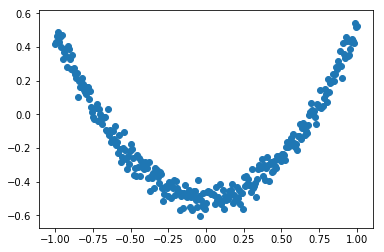

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)


In [62]:
#train for 1000 times
for i in range(1000):
    sess.run(train_step,feed_dict={input_x:x_data,input_y:y_data})
    if i % 50 == 0:
        # print(sess.run(loss,feed_dict={input_x:x_data,input_y:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={input_x:x_data})
        lines = ax.plot(x_data,prediction_value,'r',lw=5)
        plt.pause(0.1)
